<a href="https://colab.research.google.com/github/wel51x/Python-for-Data-Analysis/blob/master/ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy Basics: Arrays and Vectorized Computation

NumPy, short for Numerical Python, is one of the most important foundational packages for numerical computing in Python. Most computational packages providing scientific functionality use NumPy’s array objects as the lingua franca for data exchange.

Here are some of the things you’ll find in NumPy:

• ndarray, an efficient multidimensional array providing fast array-oriented arithmetic
operations and flexible broadcasting capabilities.

• Mathematical functions for fast operations on entire arrays of data without having to write loops.

• Tools for reading/writing array data to disk and working with memory-mapped files.

• Linear algebra, random number generation, and Fourier transform capabilities.

• A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

Because NumPy provides an easy-to-use C API, it is straightforward to pass data to external libraries written in a low-level language and also for external libraries to return data to Python as NumPy arrays. This feature has made Python a language of choice for wrapping legacy C/C++/Fortran codebases and giving them a dynamic and easy-to-use interface.

While NumPy by itself does not provide modeling or scientific functionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools with array-oriented semantics, like pandas, much more effectively. Since NumPy is a large topic, I will cover many advanced NumPy features like broadcastingin more depth later (see Appendix A).

For most data analysis applications, the main areas of functionality I’ll focus on are:

• Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations

• Common array algorithms like sorting, unique, and set operations

• Efficient descriptive statistics and aggregating/summarizing data

• Data alignment and relational data manipulations for merging and joining
together heterogeneous datasets

• Expressing conditional logic as array expressions instead of loops with if-elifelse branches

• Group-wise data manipulations (aggregation, transformation, function application)

While NumPy provides a computational foundation for general numerical data processing, many readers will want to use pandas as the basis for most kinds of statistics or analytics, especially on tabular data. pandas also provides some more domainspecific functionality like time series manipulation, which is not present in NumPy.

==>> Array-oriented computing in Python traces its roots back to 1995,
when Jim Hugunin created the Numeric library. Over the next 10
years, many scientific programming communities began doing
array programming in Python, but the library ecosystem had
become fragmented in the early 2000s. In 2005, Travis Oliphant
was able to forge the NumPy project from the then Numeric and
Numarray projects to bring the community together around a single
array computing framework.

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data. There are a number of reasons for this:

• NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.

• NumPy operations perform complex computations on entire arrays without the need for Python for loops.

In [0]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True, linewidth=161)

To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list:

In [0]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

Now let’s square each sequence:

In [0]:
%time for _ in range(10): my_arr2 = my_arr ** 2
%time for _ in range(10): my_list2 = [x ** 2 for x in my_list]

CPU times: user 23.4 ms, sys: 2.39 ms, total: 25.8 ms
Wall time: 34.8 ms
CPU times: user 3.05 s, sys: 167 ms, total: 3.22 s
Wall time: 3.22 s


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

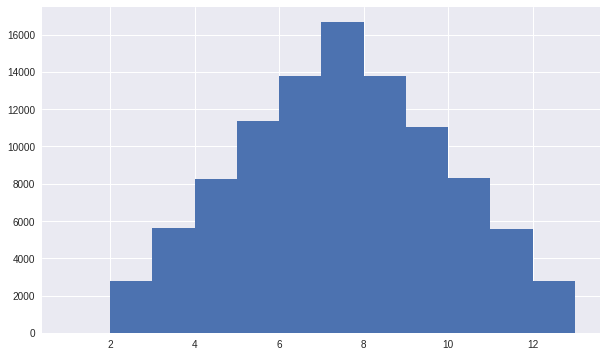

In [0]:
# Derek S Test
import random
dice = [1, 2, 3, 4, 5, 6]
tests = [random.choice(dice) + random.choice(dice) for _ in range(100000)]
plt.hist(tests, bins = range(1, 14));

## 4.1 The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray,
which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

To give you a flavor of how NumPy enables batch computations with similar syntax to scalar values on built-in Python objects, I first import NumPy and generate a small array of random data:

In [0]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-1.5074,  0.4812, -0.5667],
       [ 0.7465,  0.712 , -0.0568]])

In [0]:
print(data * 10)
print(data + data)

[[-15.0739   4.8119  -5.6673]
 [  7.465    7.1199  -0.5677]]
[[-3.0148  0.9624 -1.1335]
 [ 1.493   1.424  -0.1135]]


In the first example, all of the elements have been multiplied by 10. In the second, the corresponding values in each “cell” in the array have been added to each other.

An ndarray is a generic multidimensional container for homogeneous data; that is, all
of the elements must be the same type. Every array has a shape, a tuple indicating the
size of each dimension, and a dtype, an object describing the data type of the array:

In [0]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


This chapter will introduce you to the basics of using NumPy arrays, and should be
sufficient for following along with the rest of the book. While it’s not necessary to
have a deep understanding of NumPy for many data analytical applications, becoming
proficient in array-oriented programming and thinking is a key step along the
way to becoming a scientific Python guru.

### Creating ndarrays

The easiest way to create an array is to use the array function. This accepts any
sequence-like object (including other arrays) and produces a new NumPy array containing
the passed data. For example, a list is a good candidate for conversion:

In [3]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional
array:

In [0]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape
inferred from the data. We can confirm this by inspecting the ndim and shape
attributes:

In [0]:
arr2.ndim, arr2.shape

(2, (2, 4))

Unless explicitly specified (more on this later), np.array tries to infer a good data
type for the array that it creates. The data type is stored in a special dtype metadata
object; for example, in the previous two examples we have:

In [0]:
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int64'))

In addition to np.array, there are a number of other functions for creating new
arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a
given length or shape. empty creates an array without initializing its values to any particular
value. To create a higher dimensional array with these methods, pass a tuple
for the shape:

In [0]:
print(np.zeros(10))
print(np.zeros((3, 6)))
np.empty((2, 3, 2))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

==>> It’s not safe to assume that np.empty will return an array of all
zeros. In some cases, it may return uninitialized “garbage” values.

arange is an array-valued version of the built-in Python range function:

In [0]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

See Table 4-1 for a short list of standard array creation functions. Since NumPy is
focused on numerical computing, the data type, if not specified, will in many cases be
float64 (floating point).

### Table 4-1. Array creation functions
Function Description

array Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype
or explicitly specifying a dtype; copies the input data by default

asarray Convert input to ndarray, but do not copy if the input is already an ndarray

arange Like the built-in range but returns an ndarray instead of a list

ones,
ones_like Produce an array of all 1s with the given shape and dtype; ones_like takes another array and
produces a ones array of the same shape and dtype

zeros,
zeros_like Like ones and ones_like but producing arrays of 0s instead

empty,
empty_like Create new arrays by allocating new memory, but do not populate with any values like ones and
zeros

full,
full_like Produce an array of the given shape and dtype with all values set to the indicated “fill value”
full_like takes another array and produces a filled array of the same shape and dtype

eye, identity Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)

### Data Types for ndarrays

The data type or dtype is a special object containing the information (or metadata,
data about data) the ndarray needs to interpret a chunk of memory as a particular
type of data:

In [0]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype, arr2.dtype)

float64 int32


dtypes are a source of NumPy’s flexibility for interacting with data coming from other
systems. In most cases they provide a mapping directly onto an underlying disk or
memory representation, which makes it easy to read and write binary streams of data
to disk and also to connect to code written in a low-level language like C or Fortran.
The numerical dtypes are named the same way: a type name, like float or int, followed
by a number indicating the number of bits per element. A standard doubleprecision
floating-point value (what’s used under the hood in Python’s float object)
takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64. See
Table 4-2 for a full listing of NumPy’s supported data types.

### Table 4-2. NumPy data types
Type Type code Description

int8, uint8 i1, u1 Signed and unsigned 8-bit (1 byte) integer types

int16, uint16 i2, u2 Signed and unsigned 16-bit integer types

int32, uint32 i4, u4 Signed and unsigned 32-bit integer types

int64, uint64 i8, u8 Signed and unsigned 64-bit integer types

float16 f2 Half-precision floating point

float32 f4 or f Standard single-precision floating point; compatible with C float

float64 f8 or d Standard double-precision floating point; compatible with C double and
Python float object

float128 f16 or g Extended-precision floating point

complex64,
complex128,
complex256
c8, c16,
c32 Complex numbers represented by two 32, 64, or 128 floats, respectively

bool ? Boolean type storing True and False values

object O Python object type; a value can be any Python object

string_ S Fixed-length ASCII string type (1 byte per character); for example, to create a
string dtype with length 10, use 'S10'

unicode_ U Fixed-length Unicode type (number of bytes platform specific); same
specification semantics as string_ (e.g., 'U10')

==>> Don’t worry about memorizing the NumPy dtypes, especially if
you’re a new user. It’s often only necessary to care about the general
kind of data you’re dealing with, whether floating point, complex,
integer, boolean, string, or general Python object. When you need
more control over how data are stored in memory and on disk,
especially large datasets, it is good to know that you have control
over the storage type.

You can explicitly convert or cast an array from one dtype to another using ndarray’s
astype method:

In [0]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
float_arr.dtype

int64


dtype('float64')

In this example, integers were cast to floating point. If I cast some floating-point
numbers to be of integer dtype, the decimal part will be truncated:

In [0]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
arr.astype(np.int32)

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]


array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use astype to convert
them to numeric form:

In [0]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

==>> If casting were to fail for some reason (like a string that cannot be converted to
float64), a ValueError will be raised. Above I was a bit lazy and wrote float instead
of np.float64; NumPy aliases the Python types to its own equivalent data dtypes.

==>> It’s important to be cautious when using the numpy.string_ type,
as string data in NumPy is fixed size and may truncate input
without warning. pandas has more intuitive out-of-the-box behavior
on non-numeric data.

In [0]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

==>> Calling astype always creates a new array (a copy of the data), even
if the new dtype is the same as the old dtype.

In [0]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data
without writing any for loops. NumPy users call this vectorization. Any arithmetic
operations between equal-size arrays applies the operation element-wise:

In [0]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr * arr)
print(arr - arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


Arithmetic operations with scalars propagate the scalar argument to each element in
the array:

In [0]:
print(1 / arr, "\n", arr ** 0.5)

[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]] 
 [[1.     1.4142 1.7321]
 [2.     2.2361 2.4495]]


Comparisons between arrays of the same size yield boolean arrays:

In [0]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr)
print(arr2)
print(arr2 > arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 0.  4.  1.]
 [ 7.  2. 12.]]
[[False  True False]
 [ True False  True]]


Operations between differently sized arrays is called broadcasting and will be discussed
in more detail

### Basic Indexing and Slicing

NumPy array indexing is a rich topic, as there are many ways you may want to select
a subset of your data or individual elements. One-dimensional arrays are simple; on
the surface they act similarly to Python lists:

In [0]:
arr = np.arange(10)
print(arr)
print("arr[5] =", arr[5], "arr[5:8] =", arr[5:8])

arr[5:8] = 12
arr

[0 1 2 3 4 5 6 7 8 9]
arr[5] = 5 arr[5:8] = [5 6 7]


array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is
propagated (or broadcasted henceforth) to the entire selection. An important first distinction
from Python’s built-in lists is that array slices are views on the original array.
This means that the data is not copied, and any modifications to the view will be
reflected in the source array.

To give an example of this, I first create a slice of arr:

In [0]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

==>> data is not copied, and any modifications to the view will be
reflected in the source array.

Now, when I change values in arr_slice, the mutations are reflected in the original
array arr:

In [0]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice [:] will assign to all values in an array:

In [0]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you are new to NumPy, you might be surprised by this, especially if you have used
other array programming languages that copy data more eagerly. As NumPy has been
designed to be able to work with very large arrays, you could imagine performance
and memory problems if NumPy insisted on always copying data.

==>> If you want a copy of a slice of an ndarray instead of a view, you
will need to explicitly copy the array—for example,
arr[5:8].copy().

With higher dimensional arrays, you have many more options. In a two-dimensional
array, the elements at each index are no longer scalars but rather one-dimensional
arrays:

In [4]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit too much
work, so you can pass a comma-separated list of indices to select individual elements.
So these are equivalent:

In [5]:
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


In multidimensional arrays, if you omit later indices, the returned object will be a
lower dimensional ndarray consisting of all the data along the higher dimensions. So
in the 2 × 2 × 3 array arr3d:

In [0]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 × 3 array:

In [0]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d[0]:

In [0]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [0]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0),
forming a 1-dimensional array:

In [0]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:

In [0]:
x = arr3d[1]
x, x[0]

(array([[ 7,  8,  9],
        [10, 11, 12]]), array([7, 8, 9]))

Note that in all of these cases where subsections of the array have been selected, the
returned arrays are views.

#### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the
familiar syntax:

In [0]:
print(arr)
print(arr[1:6])

[ 0  1  2  3  4 64 64 64  8  9]
[ 1  2  3  4 64]


Consider the two-dimensional array from before, arr2d. Slicing this array is a bit
different:

In [0]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a
range of elements along an axis. It can be helpful to read the expression arr2d[:2] as
“select the first two rows of arr2d.”

You can pass multiple slices just like you can pass multiple indexes:

In [0]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions.
By mixing integer indexes and slices, you get lower dimensional slices.
For example, I can select the second row but only the first two columns like so:

In [0]:
arr2d[1, :2]

array([4, 5])

Similarly, I can select the third column but only the first two rows like so:

In [0]:
arr2d[:2, 2]

array([3, 6])

Note that a colon by itself means to take the entire
axis, so you can slice only higher dimensional axes by doing:

In [0]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole selection:

In [0]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names
with duplicates. I’m going to use here the randn function in numpy.random to generate
some random normally distributed data:

In [0]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.2047  0.4789 -0.5194 -0.5557]
 [ 1.9658  1.3934  0.0929  0.2817]
 [ 0.769   1.2464  1.0072 -1.2962]
 [ 0.275   0.2289  1.3529  0.8864]
 [-2.0016 -0.3718  1.669  -0.4386]
 [-0.5397  0.477   3.2489 -1.0212]
 [-0.5771  0.1241  0.3026  0.5238]]


Suppose each name corresponds to a row in the data array and we wanted to select
all the rows with corresponding name 'Bob'. Like arithmetic operations, comparisons
(such as ==) with arrays are also vectorized. Thus, comparing names with the
string 'Bob' yields a boolean array:

In [0]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

This boolean array can be passed when indexing the array:

In [0]:
data[names == 'Bob']

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

The boolean array must be of the same length as the array axis it’s indexing. You can
even mix and match boolean arrays with slices or integers (or sequences of integers;
more on this later).

==>> Boolean selection will not fail if the boolean array is not the correct
length, so I recommend care when using this feature.

In these examples, I select from the rows where names == 'Bob' and index the columns,
too:

In [0]:
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[-0.5194 -0.5557]
 [ 1.3529  0.8864]]
[-0.5557  0.8864]


To select everything but 'Bob', you can either use != or negate the condition using ~:

In [0]:
print(names != 'Bob')
print(data[~(names == 'Bob')])

[False  True  True False  True  True  True]
[[ 1.9658  1.3934  0.0929  0.2817]
 [ 0.769   1.2464  1.0072 -1.2962]
 [-2.0016 -0.3718  1.669  -0.4386]
 [-0.5397  0.477   3.2489 -1.0212]
 [-0.5771  0.1241  0.3026  0.5238]]


The ~ operator can be useful when you want to invert a general condition:

In [0]:
cond = names == 'Bob'
data[~cond]

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

Selecting two of the three names to combine multiple boolean conditions, use
boolean arithmetic operators like & (and) and | (or):

In [0]:
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[-0.2047  0.4789 -0.5194 -0.5557]
 [ 0.769   1.2464  1.0072 -1.2962]
 [ 0.275   0.2289  1.3529  0.8864]
 [-2.0016 -0.3718  1.669  -0.4386]]


Selecting data from an array by boolean indexing always creates a copy of the data,
even if the returned array is unchanged.

==>> The Python keywords and and or do not work with boolean arrays.
Use & (and) and | (or) instead.

Setting values with boolean arrays works in a common-sense way. To set all of the
negative values in data to 0 we need only do:

In [0]:
data[data < 0] = 0
data

array([[0.    , 0.4789, 0.    , 0.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [0.769 , 1.2464, 1.0072, 0.    ],
       [0.275 , 0.2289, 1.3529, 0.8864],
       [0.    , 0.    , 1.669 , 0.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

Setting whole rows or columns using a one-dimensional boolean array is also easy:

In [0]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

As we will see later, these types of operations on two-dimensional data are convenient
to do with pandas.

### Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.
Suppose we had an 8 × 4 array:

In [0]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or
ndarray of integers specifying the desired order:

In [0]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Hopefully this code did what you expected! Using negative indices selects rows from
the end:

In [0]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a onedimensional
array of elements corresponding to each tuple of indices:

In [0]:
arr = np.arange(32).reshape((8, 4))
print(arr)
# the elements (1, 0), (5, 3), (7, 1), and (2, 2) are selected
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]


In [0]:
# Jeez, this is all fucked-up
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of
how many dimensions the array has (here, only 2), the result of fancy indexing is
always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users
might have expected (myself included), which is the rectangular region formed by
selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [0]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new
array.

### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying
data without copying anything. Arrays have the transpose method and also the
special T attribute:

In [0]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print("Transposed:")
arr.T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Transposed:


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when
computing the inner matrix product using np.dot:

In [0]:
arr = np.random.randn(6, 3)
print(arr)
print("inner matrix product with self transposed using np.dot:")
np.dot(arr.T, arr)

[[-1.2659  0.1198 -1.0635]
 [ 0.3329 -2.3594 -0.1995]
 [-1.542  -0.9707 -1.307 ]
 [ 0.2863  0.378  -0.7539]
 [ 0.3313  1.3497  0.0699]
 [ 0.2467 -0.0119  1.0048]]
inner matrix product with self transposed using np.dot:


array([[4.3437, 1.1122, 3.3505],
       [1.1122, 8.4884, 1.4096],
       [3.3505, 1.4096, 4.4621]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute
the axes (for extra mind bending):

In [0]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
print("Transposed with a tuple of axis numbers (1, 0, 2):")
print(arr.transpose((1, 0, 2)))
print("eh?")

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
Transposed with a tuple of axis numbers (1, 0, 2):
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
eh?


Here, the axes have been reordered with the second axis first, the first axis second,
and the last axis unchanged.

Simple transposing with .T is a special case of swapping axes. ndarray has the method
swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange
the data:

In [0]:
print(arr)
print("swapaxes(1, 2):")
arr.swapaxes(1, 2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
swapaxes(1, 2):


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes similarly returns a view on the data without making a copy.

## 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like sqrt or exp:

In [0]:
arr = np.arange(10)
print(arr)
print("np.sqrt(arr)", np.sqrt(arr))
print("np.exp(arr)", np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
np.sqrt(arr) [0.     1.     1.4142 1.7321 2.     2.2361 2.4495 2.6458 2.8284 3.    ]
np.exp(arr) [   1.        2.7183    7.3891   20.0855   54.5982  148.4132  403.4288 1096.6332 2980.958  8103.0839]


###Table 4-3. Unary ufuncs
Function Description

abs, fabs Compute the absolute value element-wise for integer, floating-point, or complex values

sqrt Compute the square root of each element (equivalent to arr ** 0.5)

square Compute the square of each element (equivalent to arr ** 2)

exp Compute the exponent ex of each element

log, log10, Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively
log2, log1p

sign Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)

ceil Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that
number)

floor Compute the floor of each element (i.e., the largest integer less than or equal to each element)

rint Round elements to the nearest integer, preserving the dtype

modf Return fractional and integral parts of array as a separate array

isnan Return boolean array indicating whether each value is NaN (Not a Number)

isfinite, isinf Return boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite,
respectively

cos, cosh, sin, Regular and hyperbolic trigonometric functions
sinh, tan, tanh

arccos, arccosh, Inverse trigonometric functions
arcsin, arcsinh,
arctan, arctanh

logical_not Compute truth value of not x element-wise (equivalent to ~arr).

### Table 4-4. Binary universal functions
Function Description

add Add corresponding elements in arrays

subtract Subtract elements in second array from first array

multiply Multiply array elements

divide, floor_divide Divide or floor divide (truncating the remainder)

power Raise elements in first array to powers indicated in second array

maximum, fmax Element-wise maximum; fmax ignores NaN

minimum, fmin Element-wise minimum; fmin ignores NaN

mod Element-wise modulus (remainder of division)

copysign Copy sign of values in second argument to values in first argument

greater, greater_equal,
less, less_equal,
equal, not_equal Perform element-wise comparison, yielding boolean array (equivalent to infix
operators >, >=, <, <=, ==, !=)

logical_and,
logical_or, logical_xor Compute element-wise truth value of logical operation (equivalent to infix operators & |, ^)

In [0]:
x = np.random.randn(8)
y = np.random.randn(8)
print("np.random.randn(8)", x)
print("np.random.randn(8)", y)
np.maximum(x, y)

np.random.randn(8) [-0.2047  0.4789 -0.5194 -0.5557  1.9658  1.3934  0.0929  0.2817]
np.random.randn(8) [ 0.769   1.2464  1.0072 -1.2962  0.275   0.2289  1.3529  0.8864]


array([ 0.769 ,  1.2464,  1.0072, -0.5557,  1.9658,  1.3934,  1.3529,  0.8864])

Here, numpy.maximum computed the element-wise maximum of the elements in x and
y.

While not common, a ufunc can return multiple arrays. modf is one example, a vectorized
version of the built-in Python divmod; it returns the fractional and integral
parts of a floating-point array:

In [0]:
arr = np.random.randn(7) * 5
print("Array:", arr)
remainder, whole_part = np.modf(arr)
print("After np.modf(arr):")
print("Fractional parts:", remainder)
print("Integral parts:", whole_part)

Array: [ 3.7918 -3.3026  4.3129 -0.0502  0.25    3.3511  4.2648]
After np.modf(arr):
Fractional parts: [ 0.7918 -0.3026  0.3129 -0.0502  0.25    0.3511  0.2648]
Integral parts: [ 3. -3.  4. -0.  0.  3.  4.]


In [0]:
print("Array:", arr)
print("np.sqrt(arr)", np.sqrt(arr))
print("np.sqrt(arr, arr)", np.sqrt(arr, arr))
arr

Array: [ 3.7918 -3.3026  4.3129 -0.0502  0.25    3.3511  4.2648]
np.sqrt(arr) [1.9473    nan 2.0768    nan 0.5    1.8306 2.0651]
np.sqrt(arr, arr) [1.9473    nan 2.0768    nan 0.5    1.8306 2.0651]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.9473,    nan, 2.0768,    nan, 0.5   , 1.8306, 2.0651])

## 4.3 Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as
concise array expressions that might otherwise require writing loops. This practice of
replacing explicit loops with array expressions is commonly referred to as vectorization.
In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, with the biggest impact in
any kind of numerical computations. Later, in Appendix A, I explain broadcasting, a
powerful method for vectorizing computations.

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2)
across a regular grid of values. The np.meshgrid function takes two 1D arrays and
produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [0]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
print("1000 equally spaced points with np.meshgrid:")
print("xs:")
print(xs)
print("ys:")
print(ys)

1000 equally spaced points with np.meshgrid:
xs:
[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
ys:
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [0]:
z = np.sqrt(xs ** 2 + ys ** 2)
print("np.sqrt(xs ** 2 + ys ** 2):\n", z)

np.sqrt(xs ** 2 + ys ** 2):
 [[7.0711 7.064  7.0569 ... 7.0499 7.0569 7.064 ]
 [7.064  7.0569 7.0499 ... 7.0428 7.0499 7.0569]
 [7.0569 7.0499 7.0428 ... 7.0357 7.0428 7.0499]
 ...
 [7.0499 7.0428 7.0357 ... 7.0286 7.0357 7.0428]
 [7.0569 7.0499 7.0428 ... 7.0357 7.0428 7.0499]
 [7.064  7.0569 7.0499 ... 7.0428 7.0499 7.0569]]


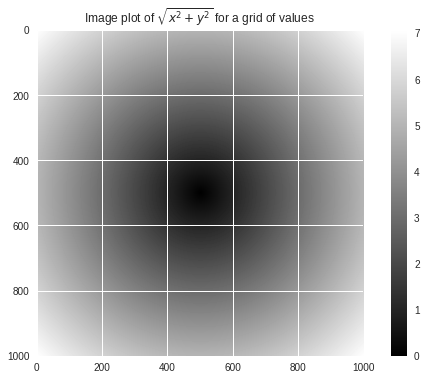

In [0]:
import matplotlib.pyplot as plt
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar();

In [0]:
#plt.draw()

In [0]:
#plt.close('all')

### Expressing Conditional Logic as Array Operations
The numpy.where function is a vectorized version of the ternary expression x if condition else y. Suppose we had a boolean array and two arrays of values:

In [0]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in
cond is True, and otherwise take the value from yarr. A list comprehension doing
this might look like:

In [0]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all
the work is being done in interpreted Python code). Second, it will not work with
multidimensional arrays. With np.where you can write this very concisely:

In [0]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to np.where don’t need to be arrays; one or both of
them can be scalars. A typical use of where in data analysis is to produce a new array
of values based on another array. Suppose you had a matrix of randomly generated
data and you wanted to replace all positive values with 2 and all negative values with
–2. This is very easy to do with np.where:

In [0]:
arr = np.random.randn(4, 4)
print(arr)
print(arr > 0)
np.where(arr > 0, 2, -2)

[[-0.9559 -0.0235 -2.3042 -0.6525]
 [-1.2183 -1.3326  1.0746  0.7236]
 [ 0.69    1.0015 -0.5031 -0.6223]
 [-0.9212 -0.7262  0.2229  0.0513]]
[[False False False False]
 [False False  True  True]
 [ True  True False False]
 [False False  True  True]]


array([[-2, -2, -2, -2],
       [-2, -2,  2,  2],
       [ 2,  2, -2, -2],
       [-2, -2,  2,  2]])

You can combine scalars and arrays when using np.where. For example, I can replace
all positive values in arr with the constant 2 like so:

In [0]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.9559, -0.0235, -2.3042, -0.6525],
       [-1.2183, -1.3326,  2.    ,  2.    ],
       [ 2.    ,  2.    , -0.5031, -0.6223],
       [-0.9212, -0.7262,  2.    ,  2.    ]])

### Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about
the data along an axis are accessible as methods of the array class. You can use aggregations
(often called reductions) like sum, mean, and std (standard deviation) either by
calling the array instance method or using the top-level NumPy function.

Here I generate some normally distributed random data and compute some aggregate
statistics:

In [0]:
arr = np.random.randn(5, 4)
print("arr:", arr)
print("arr.mean() =", arr.mean())
print("np.mean(arr) =", np.mean(arr))
print("arr.sum() =", arr.sum())

arr: [[-1.1577  0.8167  0.4336  1.0107]
 [ 1.8249 -0.9975  0.8506 -0.1316]
 [ 0.9124  0.1882  2.1695 -0.1149]
 [ 2.0037  0.0296  0.7953  0.1181]
 [-0.7485  0.585   0.1527 -1.5657]]
arr.mean() = 0.35874952203044214
np.mean(arr) = 0.35874952203044214
arr.sum() = 7.174990440608843


Functions like mean and sum take an optional axis argument that computes the statistic
over the given axis, resulting in an array with one fewer dimension:

In [0]:
print("arr.mean(axis=1) =", arr.mean(axis=1))
print("arr.sum(axis=0) =", arr.sum(axis=0))

arr.mean(axis=1) = [ 0.2758  0.3866  0.7888  0.7367 -0.3941]
arr.sum(axis=0) = [ 2.8347  0.622   4.4016 -0.6833]


Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0)
means “compute sum down the rows.”

Other methods like cumsum and cumprod do not aggregate, instead producing an array
of the intermediate results:

In [0]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
print("arr:", arr)
print("arr.cumsum() =", arr.cumsum())

arr: [0 1 2 3 4 5 6 7]
arr.cumsum() = [ 0  1  3  6 10 15 21 28]


In multidimensional arrays, accumulation functions like cumsum return an array of
the same size, but with the partial aggregates computed along the indicated axis
according to each lower dimensional slice:

In [0]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print("arr:\n", arr)
print("arr.cumsum(axis=0) =\n", arr.cumsum(axis=0))
print("arr.cumprod(axis=1) =\n", arr.cumprod(axis=1))

arr:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
arr.cumsum(axis=0) =
 [[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
arr.cumprod(axis=1) =
 [[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


###Table 4-5. Basic array statistical methods
Method Description

sum Sum of all the elements in the array or along an axis; zero-length arrays have sum 0

mean Arithmetic mean; zero-length arrays have NaN mean

std, var Standard deviation and variance, respectively, with optional degrees of freedom adjustment (defaultdenominator n)

min, max Minimum and maximum

argmin, argmax Indices of minimum and maximum elements, respectively

cumsum Cumulative sum of elements starting from 0

cumprod Cumulative product of elements starting from 1

### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus,
sum is often used as a means of counting True values in a boolean array:

In [0]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

43

There are two additional methods, any and all, useful especially for boolean arrays.
any tests whether one or more values in an array is True, while all checks if every
value is True:

In [0]:
bools = np.array([False, False, True, False])
print("bools:", bools)
print("bools.any() =", bools.any())
print("bools.all() =", bools.all())

bools: [False False  True False]
bools.any() = True
bools.all() = False


These methods also work with non-boolean arrays, where non-zero elements evaluate
to True.

### Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort
method:

In [0]:
arr = np.random.randn(6)
print("arr:", arr)
arr.sort()
print("after arr.sort() =", arr)

arr: [-0.153  -0.7519 -0.1326  1.4573  0.6095 -0.4938]
after arr.sort() = [-0.7519 -0.4938 -0.153  -0.1326  0.6095  1.4573]


You can sort each one-dimensional section of values in a multidimensional array inplace
along an axis by passing the axis number to sort:

In [0]:
arr = np.random.randn(5, 3)
print("arr:\n", arr)
arr.sort(1)
print("after arr.sort(1) =\n", arr)

arr:
 [[-0.3501  0.218  -0.8948]
 [-1.7415 -1.0523  1.4366]
 [-0.5762 -2.4203 -1.0623]
 [ 0.2374  0.001   0.0653]
 [-1.3675 -0.0303  0.9405]]
after arr.sort(1) =
 [[-0.8948 -0.3501  0.218 ]
 [-1.7415 -1.0523  1.4366]
 [-2.4203 -1.0623 -0.5762]
 [ 0.001   0.0653  0.2374]
 [-1.3675 -0.0303  0.9405]]


The top-level method np.sort returns a sorted copy of an array instead of modifying
the array in-place. A quick-and-dirty way to compute the quantiles of an array is to
sort it and select the value at a particular rank:

In [0]:
large_arr = np.random.randn(1000)
print("large_arr:\n", large_arr)
large_arr.sort()
print("after large_arr.sort() =\n", large_arr)
print("5% quantile", large_arr[int(0.05 * len(large_arr))]) # 5% quantile

Several other kinds of data manipulations related
to sorting (e.g., sorting a table of data by one or more columns) can also be found in
pandas.

### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly
used one is np.unique, which returns the sorted unique values in an array:

In [0]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print("names:", names)
print("np.unique(names):", np.unique(names))

ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print("ints:", ints)
print("np.unique(ints):", np.unique(ints))

names: ['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
np.unique(names): ['Bob' 'Joe' 'Will']
ints: [3 3 3 2 2 1 1 4 4]
np.unique(ints): [1 2 3 4]


Contrast np.unique with the pure Python alternative:

In [0]:
print("sorted(set(names)):", sorted(set(names)))

sorted(set(names)): ['Bob', 'Joe', 'Will']


Another function, np.in1d, tests membership of the values in one array in another,
returning a boolean array:

In [0]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
print("values:", values)
print("np.in1d(values, [2, 3, 6]):", np.in1d(values, [2, 3, 6]))

values: [6 0 0 3 2 5 6]
np.in1d(values, [2, 3, 6]): [ True False False  True  True False  True]


###Table 4-6. Array set operations
Method Description
unique(x) Compute the sorted, unique elements in x

intersect1d(x, y) Compute the sorted, common elements in x and y

union1d(x, y) Compute the sorted union of elements

in1d(x, y) Compute a boolean array indicating whether each element of x is contained in y

setdiff1d(x, y) Set difference, elements in x that are not in y

setxor1d(x, y) Set symmetric differences; elements that are in either of the arrays, but not both

## 4.4 File Input and Output with Arrays

NumPy is able to save and load data to and from disk either in text or binary format.
In this section I only discuss NumPy’s built-in binary format, since most users will
prefer pandas and other tools for loading text or tabular data (see Chapter 6 for much
more).

np.save and np.load are the two workhorse functions for efficiently saving and loading
array data on disk. Arrays are saved by default in an uncompressed raw binary
format with file extension .npy:

In [0]:
arr = np.arange(10)
np.save('some_array', arr)

If the file path does not already end in .npy, the extension will be appended. The array on disk can then be loaded with np.load:

In [0]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You save multiple arrays in an uncompressed archive using np.savez and passing the arrays as keyword arguments:

In [0]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an .npz file, you get back a dict-like object that loads the individual arrays lazily:

In [0]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [0]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [0]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## 4.5 Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other
square matrix math, is an important part of any array library. Unlike some languages
like MATLAB, multiplying two two-dimensional arrays with * is an element-wise
product instead of a matrix dot product. Thus, there is a function dot, both an array
method and a function in the numpy namespace, for matrix multiplication:

In [11]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print("Two arrays with dot product")
print("x:")
print(x)
print("y:")
print(y)
print("x.dot(y):")
x.dot(y)

Two arrays with dot product
x:
[[1. 2. 3.]
 [4. 5. 6.]]
y:
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
x.dot(y):


array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y) is equivalent to np.dot(x, y):

In [12]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized onedimensional
array results in a one-dimensional array:

In [13]:
np.dot(x, np.ones(3))

array([ 6., 15.])

The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix
multiplication:

In [14]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse
and determinant. These are implemented under the hood via the same industrystandard
linear algebra libraries used in other languages like MATLAB and R, such as
BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel
MKL (Math Kernel Library):

In [15]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
print("X.T.dot(np.random.randn(5, 5)):\n", mat)
print("inv(X.T.dot(np.random.randn(5, 5))):\n", inv(mat))
print("mat.dot(inv(mat)):\n", mat.dot(inv(mat)))
q, r = qr(mat)
r

X.T.dot(np.random.randn(5, 5)):
 [[ 4.2538 -1.0645  1.4407  0.9898  1.7318]
 [-1.0645  7.4431 -1.5585  4.4972 -2.1367]
 [ 1.4407 -1.5585  2.8126  0.243   1.2786]
 [ 0.9898  4.4972  0.243   5.0897  0.305 ]
 [ 1.7318 -2.1367  1.2786  0.305   1.928 ]]
inv(X.T.dot(np.random.randn(5, 5))):
 [[ 0.4057 -0.1875 -0.0764  0.1229 -0.541 ]
 [-0.1875  2.462   0.2537 -2.3367  3.0984]
 [-0.0764  0.2537  0.5435 -0.2369  0.0268]
 [ 0.1229 -2.3367 -0.2369  2.4239 -2.9264]
 [-0.541   3.0984  0.0268 -2.9264  4.8837]]
mat.dot(inv(mat)):
 [[ 1.  0. -0. -0.  0.]
 [ 0.  1.  0. -0.  0.]
 [-0.  0.  1. -0. -0.]
 [ 0.  0.  0.  1.  0.]
 [-0. -0. -0.  0.  1.]]


array([[-5.0281,  2.7734, -2.8428, -1.0619, -3.0078],
       [ 0.    , -8.7212,  1.2925, -6.5614,  1.622 ],
       [ 0.    ,  0.    , -2.0873, -1.0487, -0.6291],
       [ 0.    ,  0.    ,  0.    , -1.408 , -0.955 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.1537]])

The expression X.T.dot(X) computes the dot product of X with its transpose X.T.

### Table 4-7. Commonly used numpy.linalg functions
Function Description

diag Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal

dot Matrix multiplication

trace Compute the sum of the diagonal elements

det Compute the matrix determinant

eig Compute the eigenvalues and eigenvectors of a square matrix

inv Compute the inverse of a square matrix

pinv Compute the Moore-Penrose pseudo-inverse of a matrix

qr Compute the QR decomposition

svd Compute the singular value decomposition (SVD)

solve Solve the linear system Ax = b for x, where A is a square matrix

lstsq Compute the least-squares solution to Ax = b

## 4.6 Pseudorandom Number Generation

The numpy.random module supplements the built-in Python random with functions
for efficiently generating whole arrays of sample values from many kinds of probability
distributions. For example, you can get a 4 × 4 array of samples from the standard
normal distribution using normal:

In [16]:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.5657, -0.5625, -0.0327, -0.929 ],
       [-0.4826, -0.0363,  1.0954,  0.9809],
       [-0.5895,  1.5817, -0.5287,  0.457 ],
       [ 0.93  , -1.5693, -1.0225, -0.4028]])

Python’s built-in random module, by contrast, only samples one value at a time. As
you can see from this benchmark, numpy.random is well over an order of magnitude
faster for generating very large samples:

In [17]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1 loop, best of 3: 908 ms per loop
10 loops, best of 3: 53.2 ms per loop


We say that these are pseudorandom numbers because they are generated by an algorithm
with deterministic behavior based on the seed of the random number generator.
You can change NumPy’s random number generation seed using
np.random.seed:

In [0]:
np.random.seed(1234)

The data generation functions in numpy.random use a global random seed. To avoid
global state, you can use numpy.random.RandomState to create a random number
generator isolated from others:

In [19]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596, -0.6365,  0.0157, -2.2427])

### Table 4-8. Partial list of numpy.random functions
Function Description

seed Seed the random number generator

permutation Return a random permutation of a sequence, or return a permuted range

shuffle Randomly permute a sequence in-place

rand Draw samples from a uniform distribution

randint Draw random integers from a given low-to-high range

randn Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface)

binomial Draw samples from a binomial distribution

normal Draw samples from a normal (Gaussian) distribution

beta Draw samples from a beta distribution

chisquare Draw samples from a chi-square distribution

gamma Draw samples from a gamma distribution

uniform Draw samples from a uniform [0, 1) distribution

## 4.7 Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array
operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using
the built-in random module:

In [0]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [21]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

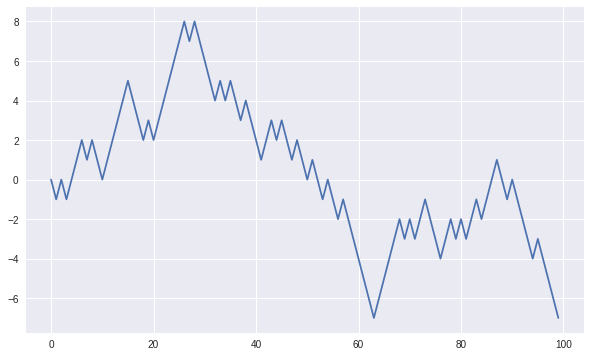

In [22]:
plt.plot(walk[:100])

In [0]:
np.random.seed(12345)

You might make the observation that walk is simply the cumulative sum of the random
steps and could be evaluated as an array expression. Thus, I use the np.random
module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the
cumulative sum:

In [0]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value
along the walk’s trajectory:

In [28]:
print(walk.min())
print(walk.max())

-3
31


A more complicated statistic is the first crossing time, the step at which the random
walk reaches a particular value. Here we might want to know how long it took the
random walk to get at least 10 steps away from the origin 0 in either direction.
np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached
or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute
this using argmax, which returns the first index of the maximum value in the
boolean array (True is the maximum value):

In [29]:
(np.abs(walk) >= 10).argmax()

37

Note that using argmax here is not always efficient because it always makes a full scan
of the array. In this special case, once a True is observed we know it to be the maximum
value.

### Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say 5,000 of them, you can generate
all of the random walks with minor modifications to the preceding code. If passed a
2-tuple, the numpy.random functions will generate a two-dimensional array of draws,
and we can compute the cumulative sum across the rows to compute all 5,000 random
walks in one shot:

In [30]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

Now, we can compute the maximum and minimum values obtained over all of the
walks:

In [31]:
walks.max(), walks.min()

(138, -133)

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is
slightly tricky because not all 5,000 of them reach 30. We can check this using the any
method:

In [32]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30, hits30.sum() # Number that hit 30 or -30

(array([False,  True, False, ..., False,  True, False]), 3410)

We can use this boolean array to select out the rows of walks that actually cross the
absolute 30 level and call argmax across axis 1 to get the crossing times:

In [33]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

Feel free to experiment with other distributions for the steps other than equal-sized
coin flips. You need only use a different random number generation function, like
normal to generate normally distributed steps with some mean and standard
deviation:

In [0]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## 4.8 Conclusion
While much of the rest of the book will focus on building data wrangling skills with
pandas, we will continue to work in a similar array-based style. In Appendix A, we
will dig deeper into NumPy features to help you further develop your array computing
skills.